Notebook used to investigate how mean squared error of best model performance and average model perfomance as it changes with number of trees

Trees are at default depth (Max)
Utilizing entire dataset

use min_leaf_nodes

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stat
import numpy as np 
#import forestsci
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter

import sys
sys.path.append("..")
import Utility.model_utils as model_utils

In [2]:
# Runtime Variables
number_trees = 0
seed = 72
accuracy_array = []

# Data Input
filename = '../Results/training_data.csv'

# If saving model, set save to True and give meaningful name
#model_name = 'RF_C_MC.sav'
#save = False 


# Control what features are used by the model
label="Labels"
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
#      'moments_hu-3',
#      'moments_hu-4',
#      'moments_hu-5',
#      'moments_hu-6',
#    'eccentricity'
         ]


In [23]:
import time
start_time = time.time()

best_f1 = 0
best_model = None
best_model_test_f1_arr = []
best_model_train_f1_arr = []
avg_model_test_f1_arr = []
avg_model_train_f1_arr = []
all_model_test_f1_arr = []
all_model_train_f1_arr = []

number_trees_arr = np.arange(1,100,5)
seeds_arr = np.arange(50)

for number_trees in number_trees_arr:
    model_test_f1_arr = []
    model_train_f1_arr = []
    for seed in seeds_arr: # 50 runs 
        df = pd.read_csv(filename) # Read in data w/ features

        # Modify Data (Remove illegal data OR set different runtime)
        # Change how data is grouped
        df['Labels'].replace('Poorly Segmented', 'Incomplete', inplace=True) # Group Poorly Segmented and Incomplete as a single class
        df['Labels'].replace('Multiple Crystal', 'Crystal', inplace=True) # Group Multiple Crystal and Crystal as a single class
        #df = df[df['Labels'] != "Incomplete"] # Remove any data labeled as "Incomplete"

        # Missed Labels: Purge any bad data that the model cannot run on
        df['Labels'].replace('', np.nan, inplace=True) 
        df.dropna(subset=['Labels'], inplace=True)
        # Numerical errors (divide by 0)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        for feature in features:
            df.dropna(subset=[feature],inplace=True)

        # Split Data
        X=df[features]
        y=df[label]

        #print(Counter(y))

        # Encode
        ohe = OneHotEncoder(sparse=False)
        y = ohe.fit_transform(df[[label]])

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

        # Create RandomForestRegressor
        rfr=RandomForestRegressor(n_estimators = number_trees,oob_score=False)
        rfr.fit(X_train,y_train)

        # Accuracy Checks
        y_pred_test = rfr.predict(X_test)
        y_pred_test = np.round(y_pred_test)
        test_accuracy = metrics.f1_score(y_test,y_pred_test,average='micro')
        model_test_f1_arr.append(test_accuracy)
        
        y_pred_train = rfr.predict(X_train)
        y_pred_train = np.round(y_pred_train)
        train_accuracy = metrics.f1_score(y_train,y_pred_train,average='micro')
        model_train_f1_arr.append(train_accuracy)
        
        #accuracy = metrics.accuracy_score(y_test,y_pred)
        if seed % 10 == 0:
            print(f'{seed} Seed Completed...')

    best_index = np.argmax(model_test_f1_arr)    
    best_model_test_f1_arr.append(model_test_f1_arr[best_index])
    best_model_train_f1_arr.append(model_train_f1_arr[best_index])
    avg_model_test_f1_arr.append(np.mean(model_test_f1_arr))
    avg_model_train_f1_arr.append(np.mean(model_train_f1_arr))
    all_model_test_f1_arr.append(model_test_f1_arr)
    all_model_train_f1_arr.append(model_train_f1_arr)
    elapsed_time = time.time() - start_time

    print(f'Forest of {number_trees} evaluated, time elapsed: {elapsed_time}')

0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Forest of 1 evaluated, time elapsed: 4.676416635513306
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Forest of 6 evaluated, time elapsed: 11.482684135437012
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Forest of 11 evaluated, time elapsed: 20.643481254577637
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Forest of 16 evaluated, time elapsed: 31.86492133140564
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Forest of 21 evaluated, time elapsed: 45.23190140724182
0 Seed Completed...
10 Seed Completed...
20 Seed Completed...
30 Seed Completed...
40 Seed Completed...
Forest of 26 evaluated, time elapsed: 60.73562002182007
0 Seed Completed...
10 Seed Completed...

In [16]:
print(f'Best Model F1: {best_f1}')
#print(best_model.oob_score_)
#print(best_model.score(X_train,y_train))
print(ohe)
print(ohe.feature_names_in_)
ohe.get_feature_names_out(['Labels'])

Best Model F1: 0
OneHotEncoder(sparse=False)
['Labels']


array(['Labels_Crystal', 'Labels_Incomplete'], dtype=object)

0.8917899249732048
[0.7483870967741936, 0.8283261802575107, 0.7553648068669527, 0.728051391862955, 0.793103448275862, 0.7880085653104925, 0.7526881720430108, 0.8222698072805138, 0.7777777777777778, 0.7596566523605149, 0.7553648068669527, 0.7751605995717344, 0.7777777777777778, 0.7510729613733904, 0.7708779443254817, 0.7596566523605149, 0.7794432548179872, 0.7965738758029978, 0.776824034334764, 0.7904967602591791, 0.7939914163090129, 0.7735042735042735, 0.7854077253218884, 0.776824034334764, 0.7880085653104925, 0.7751605995717344, 0.776824034334764, 0.7751605995717344, 0.7612903225806451, 0.7715517241379309, 0.7553648068669527, 0.778494623655914, 0.761904761904762, 0.7922912205567451, 0.7809110629067245, 0.7844827586206897, 0.7311827956989247, 0.753747323340471, 0.773218142548596, 0.7715517241379309, 0.8043010752688172, 0.7751605995717344, 0.7629310344827586, 0.7526881720430108, 0.8043010752688172, 0.7818574514038876, 0.7854077253218884, 0.7580299785867237, 0.7612903225806451, 0.7784946

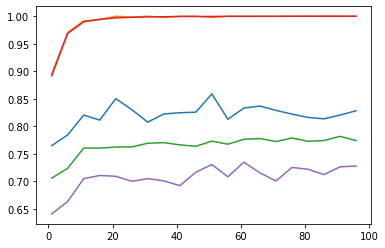

In [27]:
plt.plot(number_trees_arr,best_model_test_f1_arr)
plt.plot(number_trees_arr,best_model_train_f1_arr)
plt.plot(number_trees_arr,avg_model_test_f1_arr)
plt.plot(number_trees_arr,avg_model_train_f1_arr)
plt.plot(number_trees_arr,[min(arr) for arr in all_model_test_f1_arr])
print(avg_model_train_f1_arr[0])
print(model_test_f1_arr)
print([min(arr) for arr in all_model_test_f1_arr])

In [5]:
# Feature Importances

from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=2)
elapsed_time = time.time() - start_time

print(f'Time elapsed: {elapsed_time}')
forest_importances = pd.Series(result.importances_mean, index=features)

Time elapsed: 2.9223012924194336
